### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de RAW de MI-EEG con LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego la transpuesta

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 1000))
x_test = x_test.reshape((n_samples_test, 22, 1000))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1000)
(288, 22, 1000)


In [0]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 22)
(288, 1000, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 288 samples, validate on 288 samples
Epoch 1/10
288/288 - 76s - loss: 1.3907 - acc: 0.2326 - val_loss: 1.3866 - val_acc: 0.2396
Epoch 2/10
288/288 - 74s - loss: 1.3697 - acc: 0.3125 - val_loss: 1.3971 - val_acc: 0.2465
Epoch 3/10
288/288 - 75s - loss: 1.3531 - acc: 0.3125 - val_loss: 1.4418 - val_acc: 0.2500
Epoch 4/10
288/288 - 74s - loss: 1.3270 - acc: 0.3854 - val_loss: 1.4537 - val_acc: 0.2431
Epoch 5/10
288/288 - 75s - loss: 1.3190 - acc: 0.3958 - val_loss: 1.4679 - val_acc: 0.2396
Epoch 6/10
288/288 - 75s - loss: 1.3145 - acc: 0.3854 - val_loss: 1.4772 - val_acc: 0.2674
Epoch 7/10
288/288 - 75s - loss: 1.2719 - acc: 0.4167 - val_loss: 1.5245 - val_acc: 0.2674
Epoch 8/10
288/288 - 75s - loss: 1.2645 - acc: 0.4410 - val_loss: 1.5334 - val_acc: 0.2951
Epoch 9/10
288/288 - 75s - loss: 1.252

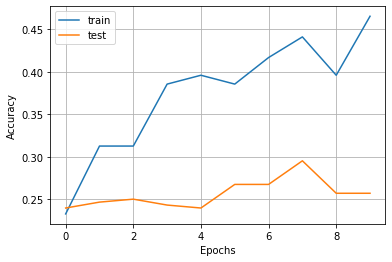

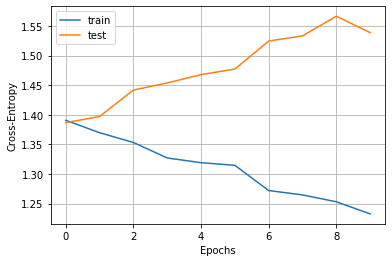

Iteration: 2
Train on 288 samples, validate on 288 samples
Epoch 1/10
288/288 - 76s - loss: 1.3876 - acc: 0.2326 - val_loss: 1.3874 - val_acc: 0.2500
Epoch 2/10
288/288 - 74s - loss: 1.3742 - acc: 0.2812 - val_loss: 1.3967 - val_acc: 0.2951
Epoch 3/10
288/288 - 74s - loss: 1.3503 - acc: 0.3438 - val_loss: 1.4405 - val_acc: 0.2535
Epoch 4/10
288/288 - 74s - loss: 1.3268 - acc: 0.3507 - val_loss: 1.4609 - val_acc: 0.2500
Epoch 5/10
288/288 - 74s - loss: 1.3235 - acc: 0.3715 - val_loss: 1.4447 - val_acc: 0.2500
Epoch 6/10
288/288 - 74s - loss: 1.2988 - acc: 0.3889 - val_loss: 1.4723 - val_acc: 0.2882
Epoch 7/10
288/288 - 73s - loss: 1.2722 - acc: 0.4479 - val_loss: 1.5142 - val_acc: 0.2674
Epoch 8/10
288/288 - 73s - loss: 1.2485 - acc: 0.4479 - val_loss: 1.5304 - val_acc: 0.2396
Epoch 9/10
288/288 - 73s - loss: 1.2309 - acc: 0.4375 - val_loss: 1.5831 - val_acc: 0.2465
Epoch 10/10
288/288 - 74s - loss: 1.2028 - acc: 0.4444 - val_loss: 1.6290 - val_acc: 0.2500
288/288 [=====================

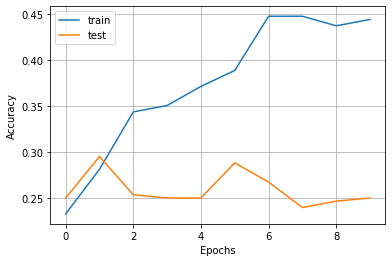

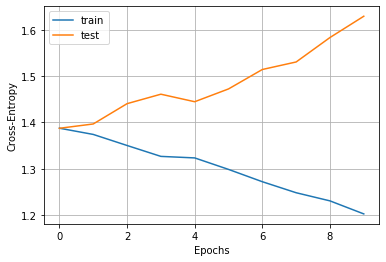


Resultados:
loss: [1.5387686358557806, 1.6289704110887315]
accuracy: [0.25694445, 0.25]
kappa: [0.0092592592592593, 0.0]
precision: [0.2586165270273797, 0.23590426783361565]
recall: [0.2569444444444444, 0.25]
f1: [0.2558358850858946, 0.23262084865133859]


In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(2): #solo dos iteraciones
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1000,22)))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    #solo 10 epocas
    history = model.fit(x_train, y_train, epochs=10, batch_size=18, validation_data=(x_test, y_test), verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1000, 64)          22272     
_________________________________________________________________
lstm_4 (LSTM)                (None, 1000, 64)          33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 88,580
Trainable params: 88,580
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.2535
std: (+/- 0.0035)
kappa: 0.0046
std: 0.0046
precision: 0.2473
recall: 0.2535
f1: 0.2442
